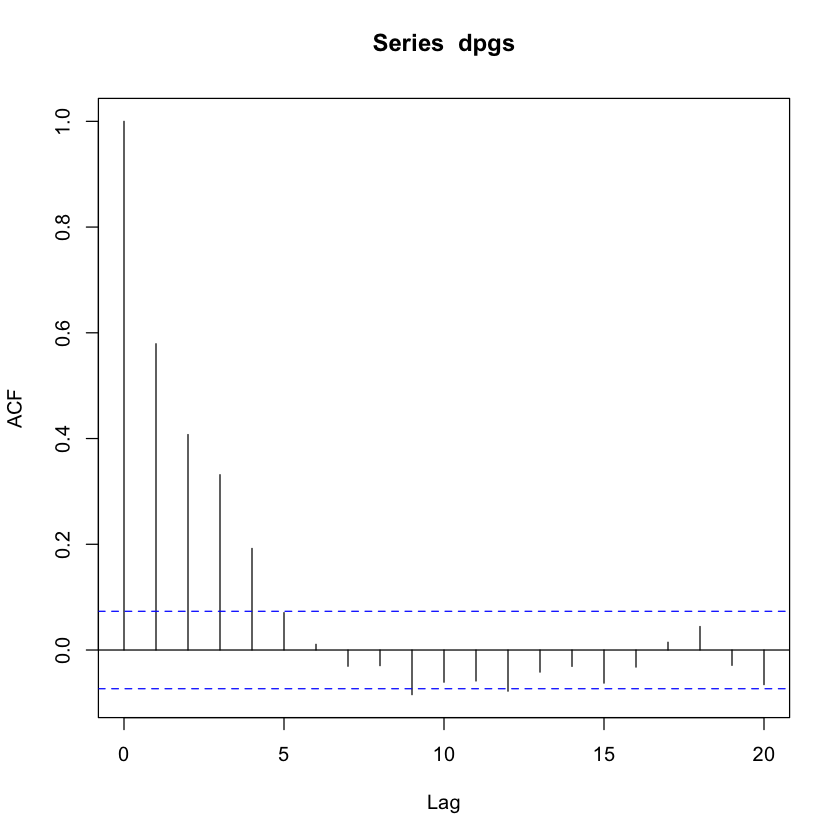

[1] 5


	One Sample t-test

data:  dpgs
t = 1.3062, df = 715, p-value = 0.1919
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0005536374  0.0027549956
sample estimates:
  mean of x 
0.001100679 


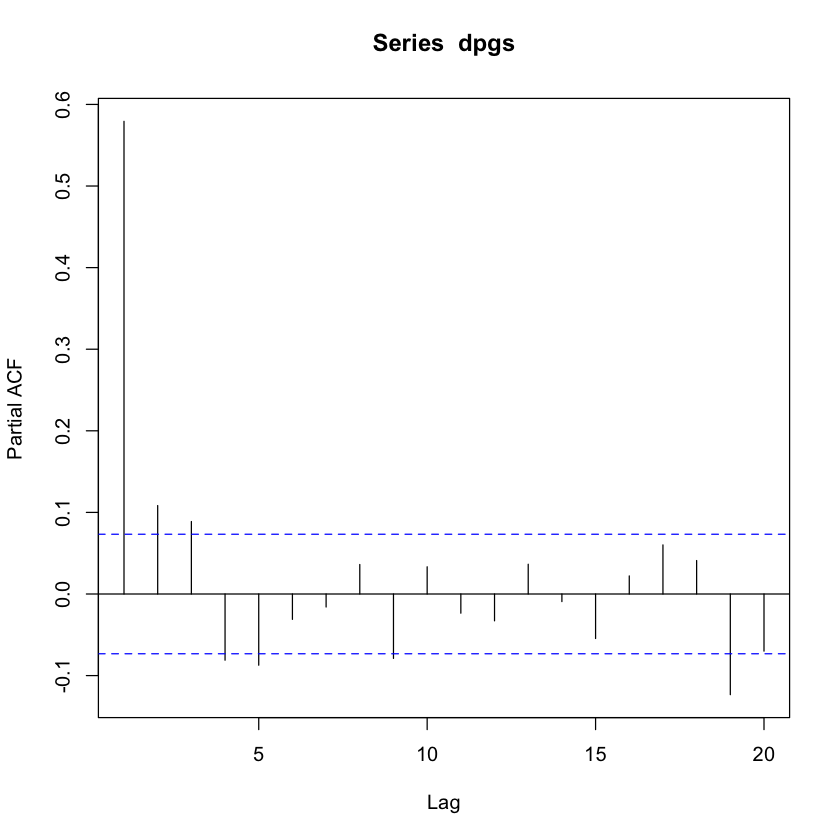

In [31]:
da=read.table("ch3data/w-petroprice.txt",header=T)
da1=read.table("ch3data/w-gasoline.txt")
pgs=log(da1[,1])
pus=log(da$US)
tdx=c(1:717)/52+1997  # calendar time
dpgs=diff(pgs)
acf(dpgs,lag=20)
pacf(dpgs,lag=20)

m1=ar(diff(pgs),method='mle')
m1$order
t.test(dpgs)


Call:
arima(x = dpgs, order = c(5, 0, 0), include.mean = F, transform.pars = FALSE, 
    fixed = c(NA, NA, NA, 0, NA))

Coefficients:
         ar1     ar2     ar3  ar4      ar5
      0.5036  0.0789  0.1220    0  -0.1009
s.e.  0.0370  0.0418  0.0385    0   0.0330

sigma^2 estimated as 0.0003265:  log likelihood = 1857.48,  aic = -3704.96

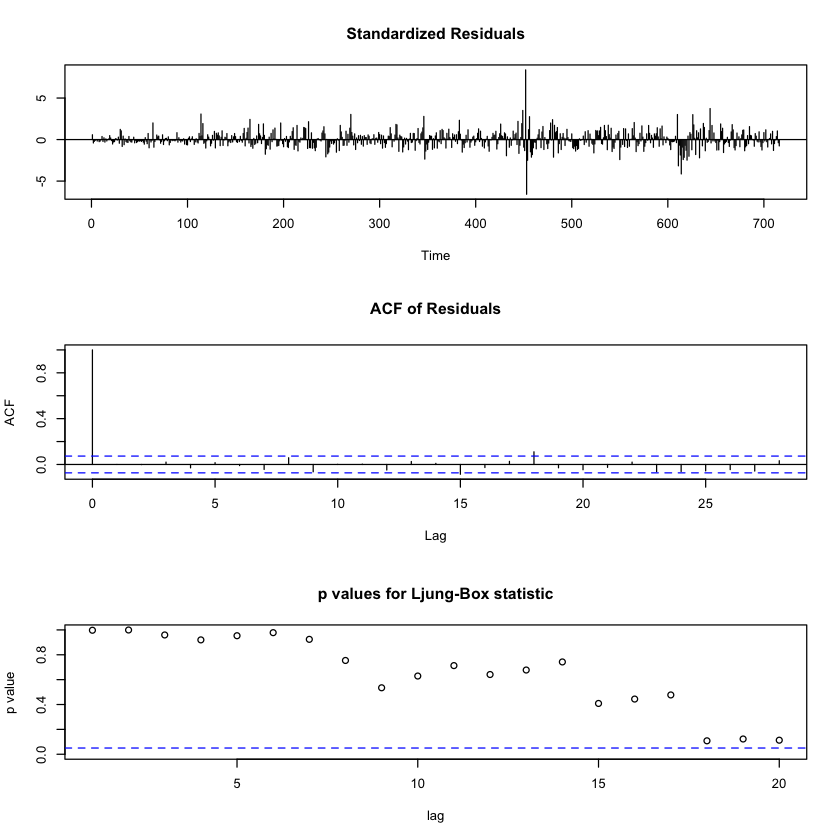

In [32]:
#m1=arima(dpgs,order=c(5,0,0),include.mean=F)
#m1
m1=arima(dpgs,order=c(5,0,0),include.mean=F,fixed=c(NA,NA,NA,0,NA),transform.pars = FALSE)
m1
tsdiag(m1,gof=20)

In [33]:
dpus=diff(pus)
m3=lm(dpgs~-1+dpus)
summary(m3)


Call:
lm(formula = dpgs ~ -1 + dpus)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.076149 -0.008834  0.000365  0.009441  0.151350 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
dpus  0.28703    0.01507   19.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01839 on 715 degrees of freedom
Multiple R-squared:  0.3366,	Adjusted R-squared:  0.3357 
F-statistic: 362.8 on 1 and 715 DF,  p-value: < 2.2e-16


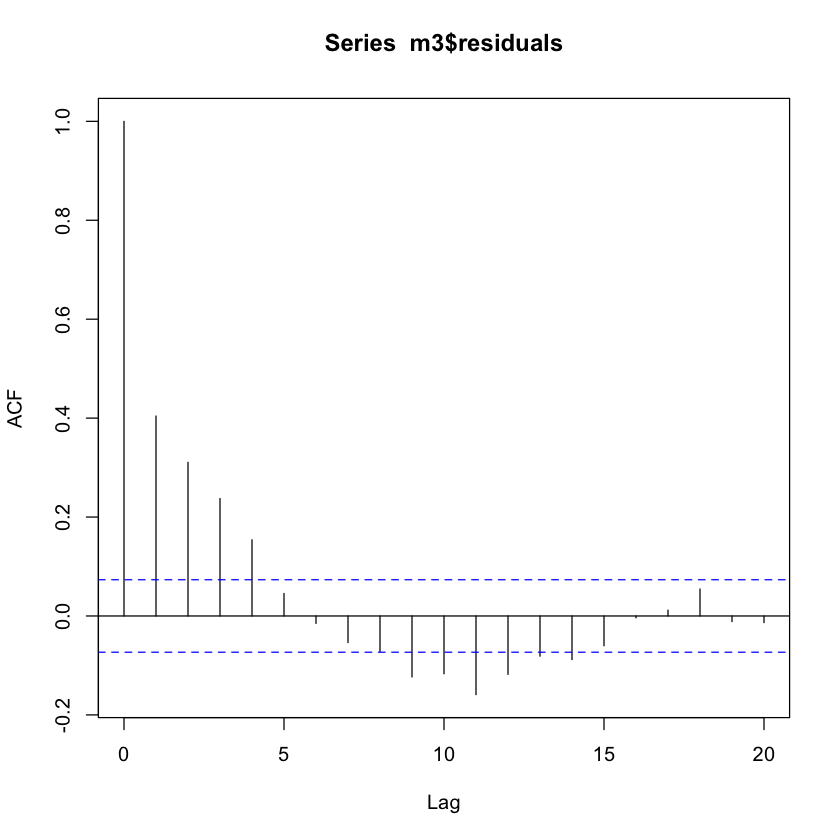

[1] 6

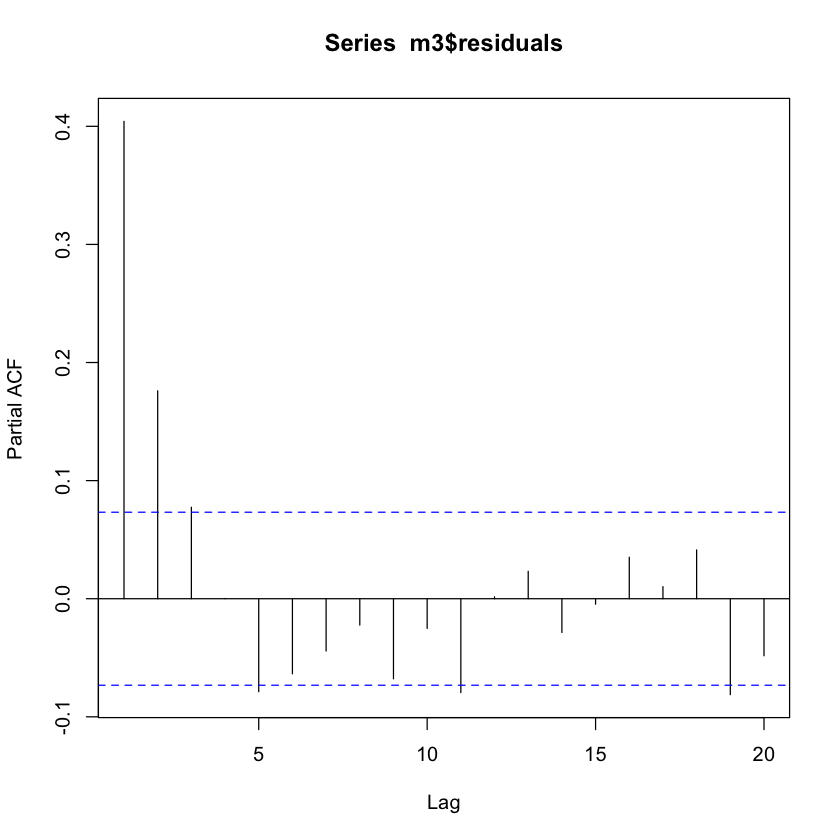

In [34]:
acf(m3$residuals,lag=20)
pacf(m3$residuals,lag=20)
m4=ar(m3$residuals,method='mle')
m4$order


Call:
arima(x = dpgs, order = c(5, 0, 0), xreg = dpus, include.mean = F, transform.pars = FALSE, 
    fixed = c(NA, NA, NA, 0, NA, NA))

Coefficients:
         ar1     ar2     ar3  ar4      ar5    dpus
      0.4037  0.1642  0.0961    0  -0.1014  0.1911
s.e.  0.0386  0.0399  0.0386    0   0.0345  0.0136

sigma^2 estimated as 0.0002532:  log likelihood = 1948.48,  aic = -3884.95

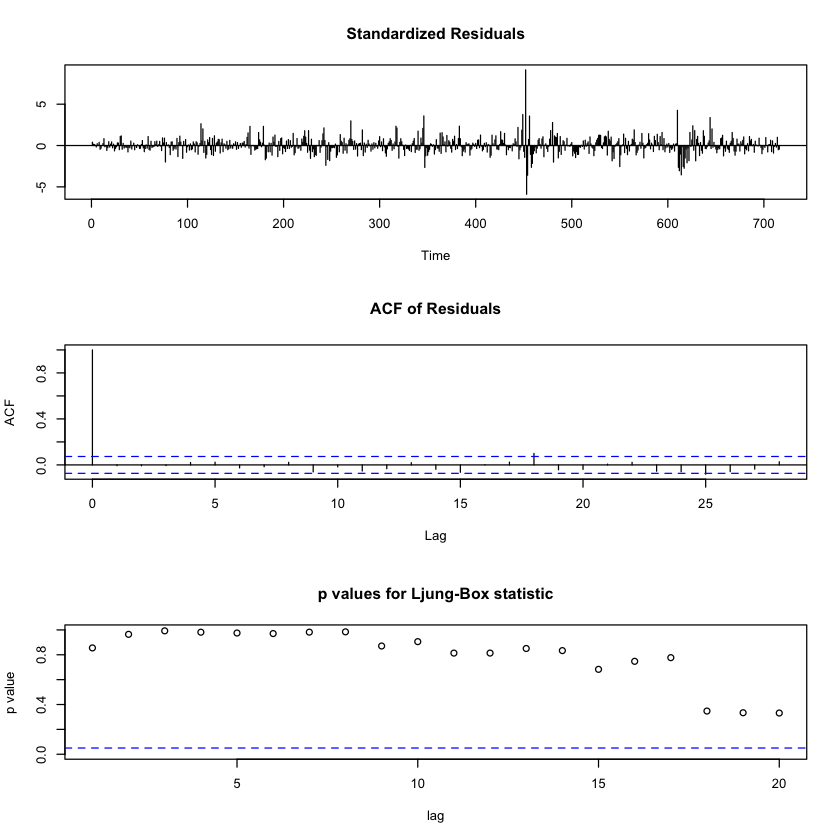

In [35]:
#m4=arima(dpgs,order=c(6,0,0),include.mean=F,xreg=dpus)
#m4

m4=arima(dpgs,order=c(5,0,0),include.mean=F,xreg=dpus,fixed=c(NA,NA,NA,0,NA,NA),transform.pars = FALSE)
m4
tsdiag(m4,gof=20)


Call:
lm(formula = dpgs[2:716] ~ -1 + dpus[1:715])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.088318 -0.011145 -0.000011  0.011391  0.161679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
dpus[1:715]  0.18560    0.01716   10.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02093 on 714 degrees of freedom
Multiple R-squared:  0.1408,	Adjusted R-squared:  0.1395 
F-statistic:   117 on 1 and 714 DF,  p-value: < 2.2e-16


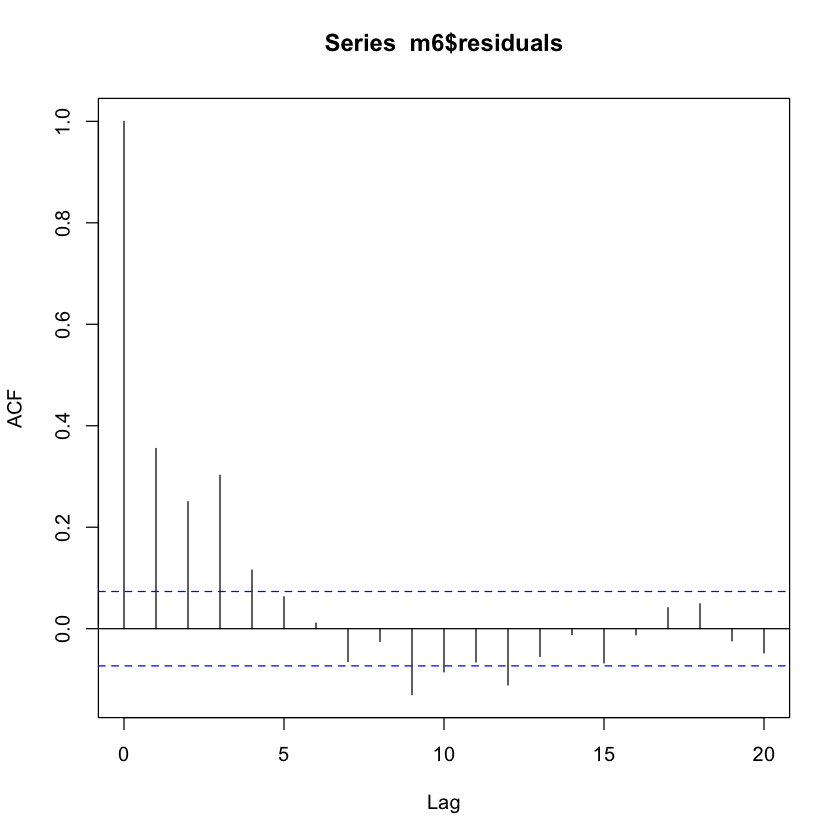

[1] 9


Call:
arima(x = dpgs[2:716], order = c(9, 0, 0), xreg = dpus[1:715], include.mean = F, 
    transform.pars = FALSE, fixed = c(NA, NA, NA, 0, NA, 0, 0, 0, NA, NA))

Coefficients:
         ar1     ar2     ar3  ar4      ar5  ar6  ar7  ar8      ar9  dpus[1:715]
      0.4544  0.0877  0.1415    0  -0.0830    0    0    0  -0.0640       0.0406
s.e.  0.0427  0.0413  0.0393    0   0.0345    0    0    0   0.0318       0.0176

sigma^2 estimated as 0.000323:  log likelihood = 1858.7,  aic = -3703.4

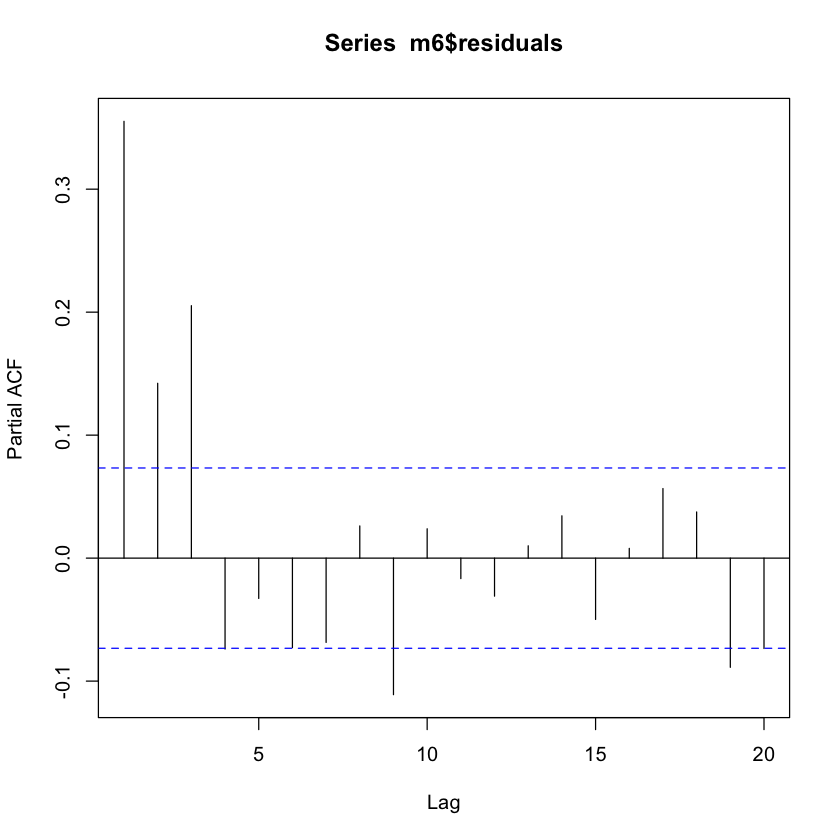

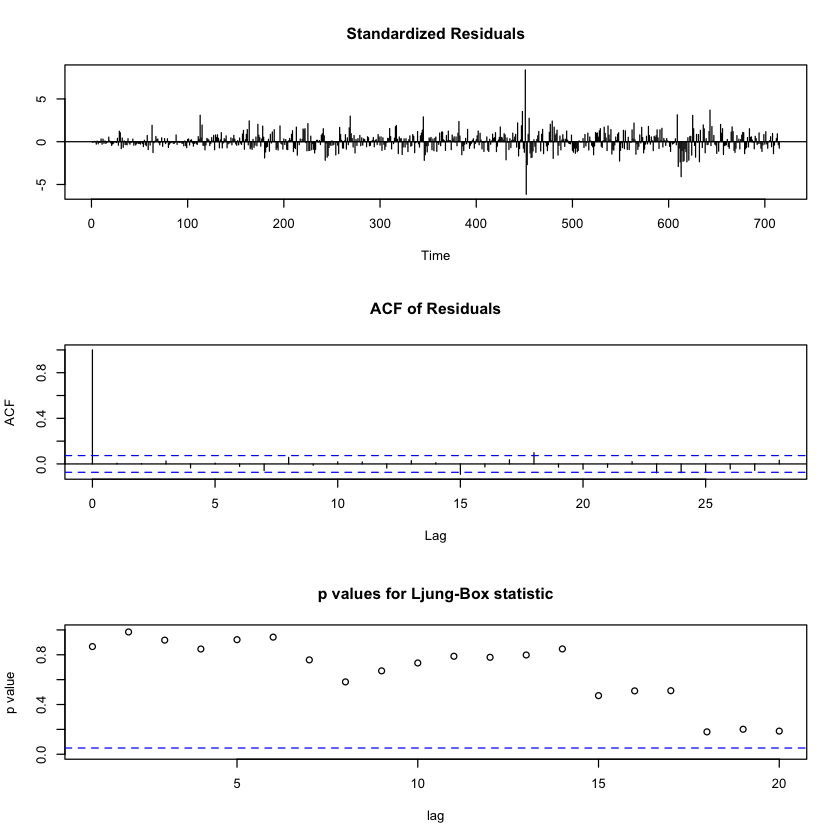

In [36]:
m6=lm(dpgs[2:716]~-1+dpus[1:715])
summary(m6)

acf(m6$residuals,lag=20)
pacf(m6$residuals,lag=20)
m7=ar(m6$residuals,method='mle')
m7$order
#m7=arima(dpgs[2:716],order=c(9,0,0),include.mean=F,xreg=dpus[1:715])
#m7
m7=arima(dpgs[2:716],order=c(9,0,0),include.mean=F,xreg=dpus[1:715],fixed=c(NA,NA,NA,0,NA,0,0,0,NA,NA),transform.pars = FALSE)
m7
tsdiag(m7,gof=20)

In [37]:
source("backtest.R") # Compile the R script
c1=c(NA,NA,NA,0,NA)
pm1=backtest(m1,dpgs,316,1,fixed=c1,inc.mean=F)
c4=c(NA,NA,NA,0,NA,NA)
pm4=backtest(m4,dpgs,316,1,xre=dpus,inc.mean=F,fixed=c4)
c7=c(NA,NA,NA,0,NA,0,0,0,NA,NA)
pm7=backtest(m7,dpgs[2:716],315,1,xre=dpus[1:715],inc.mean=F,fixed=c7)

[1] "RMSE of out-of-sample forecasts"
[1] 0.02171235
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.01537881
[1] "RMSE of out-of-sample forecasts"
[1] 0.01925732
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.01285104
[1] "RMSE of out-of-sample forecasts"
[1] 0.0216638
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.01548401


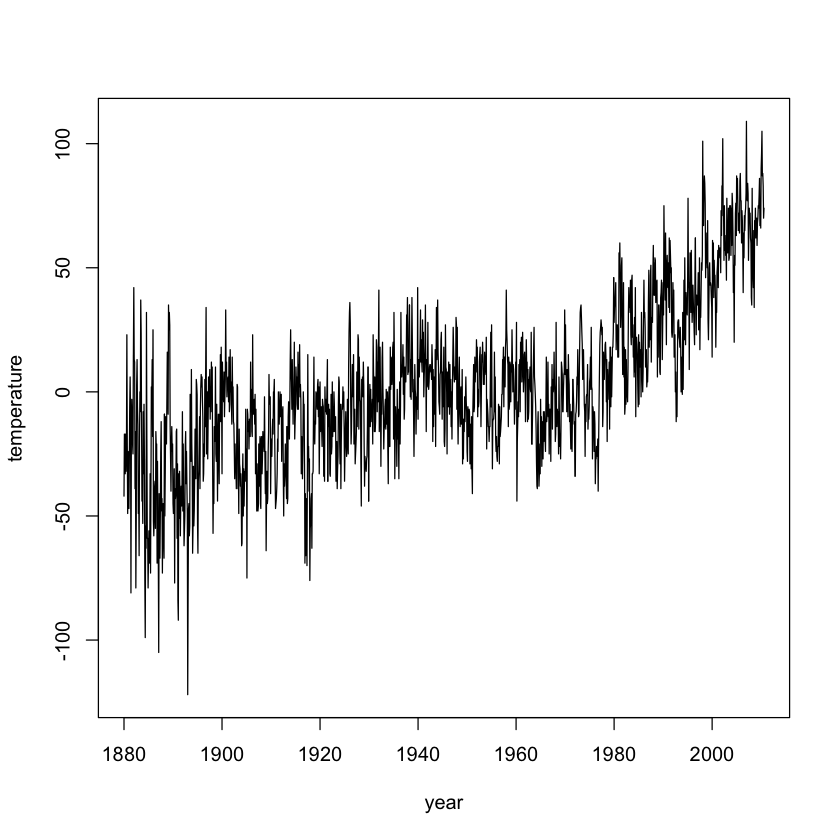

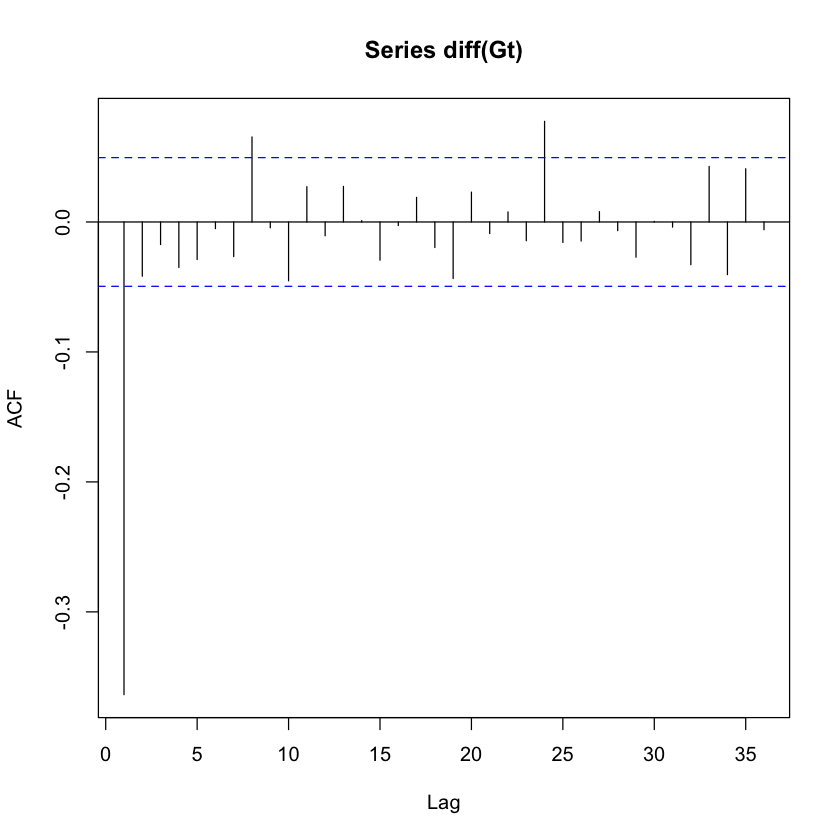


Call:
arima(x = Gt, order = c(1, 1, 2))

Coefficients:
         ar1      ma1     ma2
      0.7387  -1.2973  0.3183
s.e.  0.0406   0.0533  0.0492

sigma^2 estimated as 272.1:  log likelihood = -6616.56,  aic = 13239.11

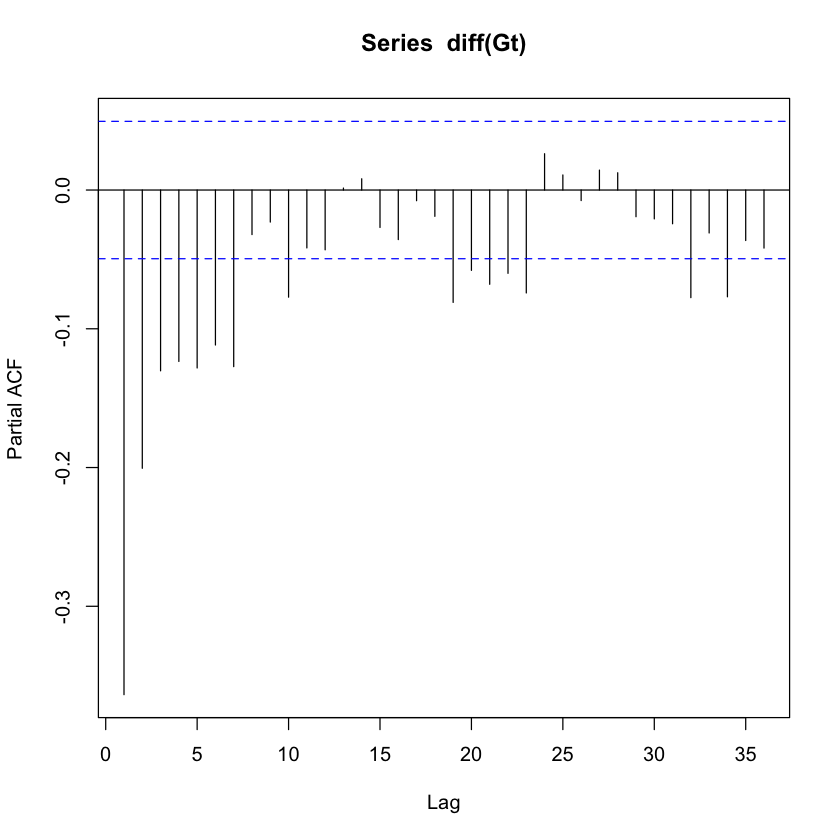

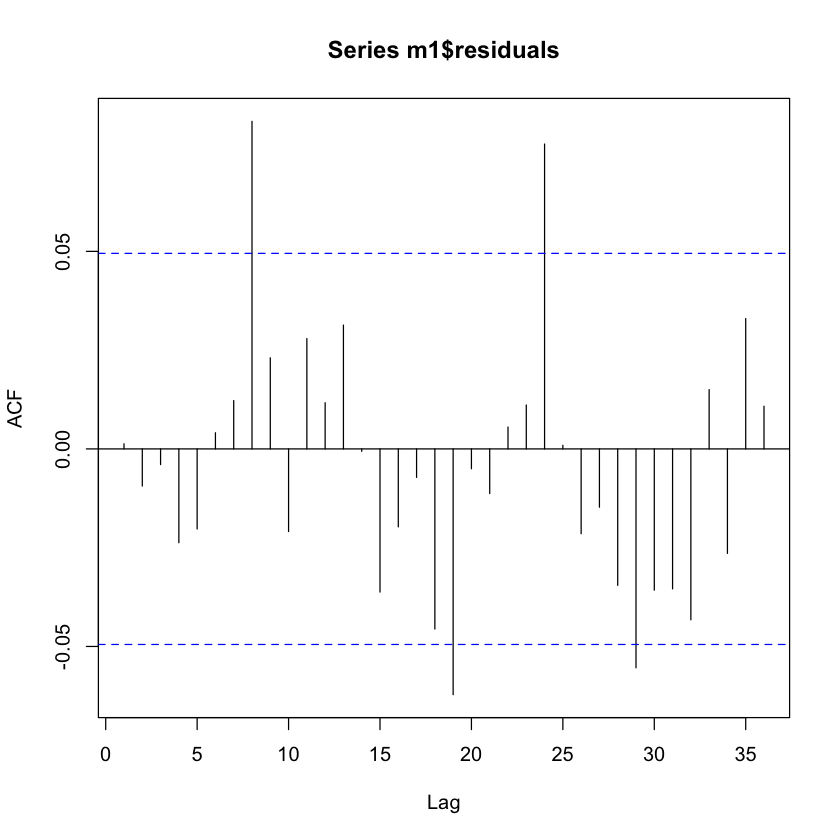

In [43]:
## Global temperature
Gt=scan(file='ch3data/m-GLBTs.txt')
Gtemp=ts(Gt,frequency=12,start=c(1880,1))
plot(Gtemp,xlab='year',ylab='temperature',type='l') # Plot the data
acf(diff(Gt),lag=36)
pacf(diff(Gt),lag=36)
m1=arima(Gt,order=c(1,1,2))
m1
acf(m1$residuals,lag=36)


Call:
arima(x = Gt, order = c(1, 1, 2), seasonal = list(order = c(0, 0, 1), period = 24))

Coefficients:
         ar1      ma1     ma2    sma1
      0.7612  -1.3241  0.3416  0.0717
s.e.  0.0379   0.0519  0.0485  0.0243

sigma^2 estimated as 270.6:  log likelihood = -6612.2,  aic = 13232.4

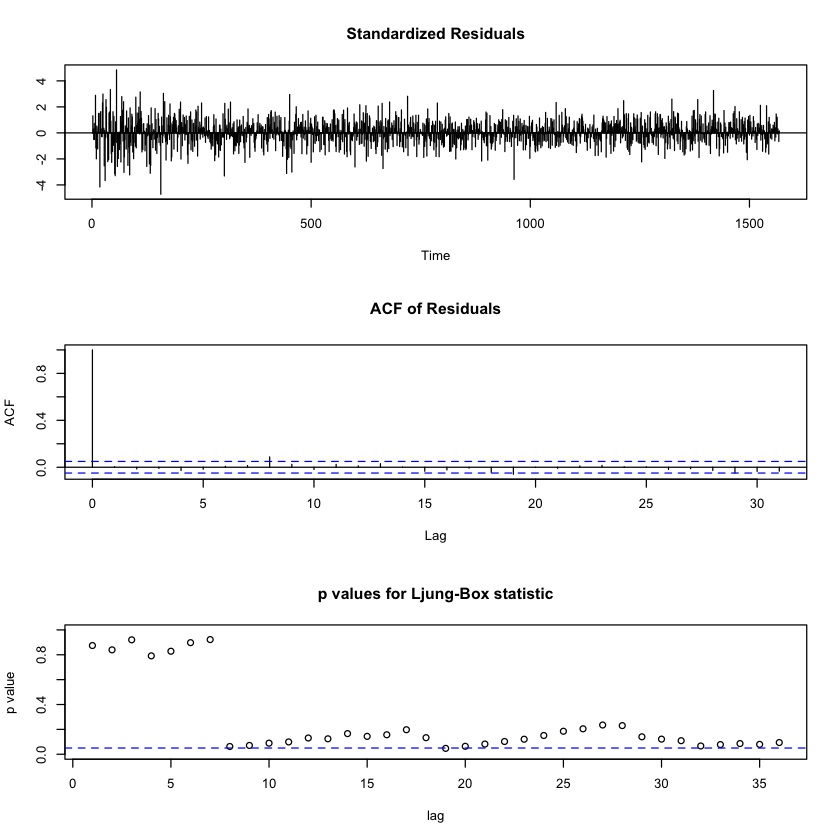

In [44]:
m1=arima(Gt,order=c(1,1,2),seasonal=list(order=c(0,0,1),period=24))
m1
tsdiag(m1,gof=36)


Call:
lm(formula = Gt ~ time)

Residuals:
    Min      1Q  Median      3Q     Max 
-92.055 -15.634   0.194  15.296  78.751 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -38.039763   1.134960  -33.52   <2e-16 ***
time          0.051560   0.001253   41.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.46 on 1566 degrees of freedom
Multiple R-squared:  0.5195,	Adjusted R-squared:  0.5192 
F-statistic:  1693 on 1 and 1566 DF,  p-value: < 2.2e-16



Call:
arima(x = Gt, order = c(2, 0, 1), xreg = time)

Coefficients:
         ar1      ar2      ma1  intercept    xreg
      1.2385  -0.2719  -0.7802   -38.8493  0.0530
s.e.  0.0567   0.0477   0.0460     5.3548  0.0059

sigma^2 estimated as 272.9:  log likelihood = -6622.99,  aic = 13255.97

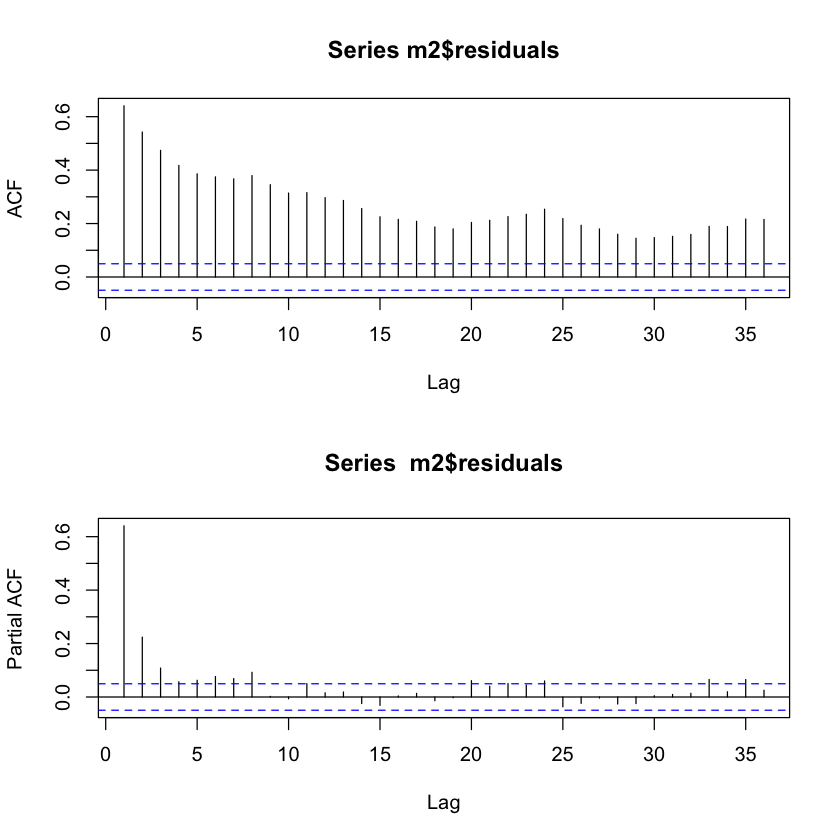


Call:
arima(x = Gt, order = c(2, 0, 1), seasonal = list(order = c(0, 0, 1), period = 24), 
    xreg = time)

Coefficients:
         ar1      ar2      ma1    sma1  intercept    xreg
      1.1960  -0.2394  -0.7451  0.0856   -38.7150  0.0529
s.e.  0.0587   0.0482   0.0486  0.0241     5.1843  0.0057

sigma^2 estimated as 270.8:  log likelihood = -6616.72,  aic = 13245.45

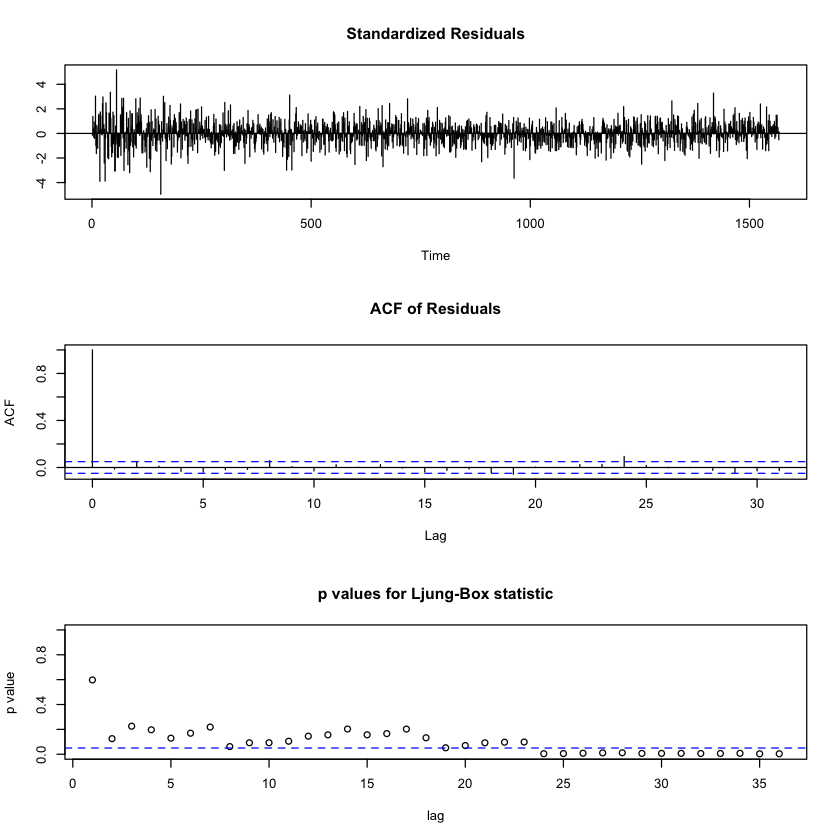

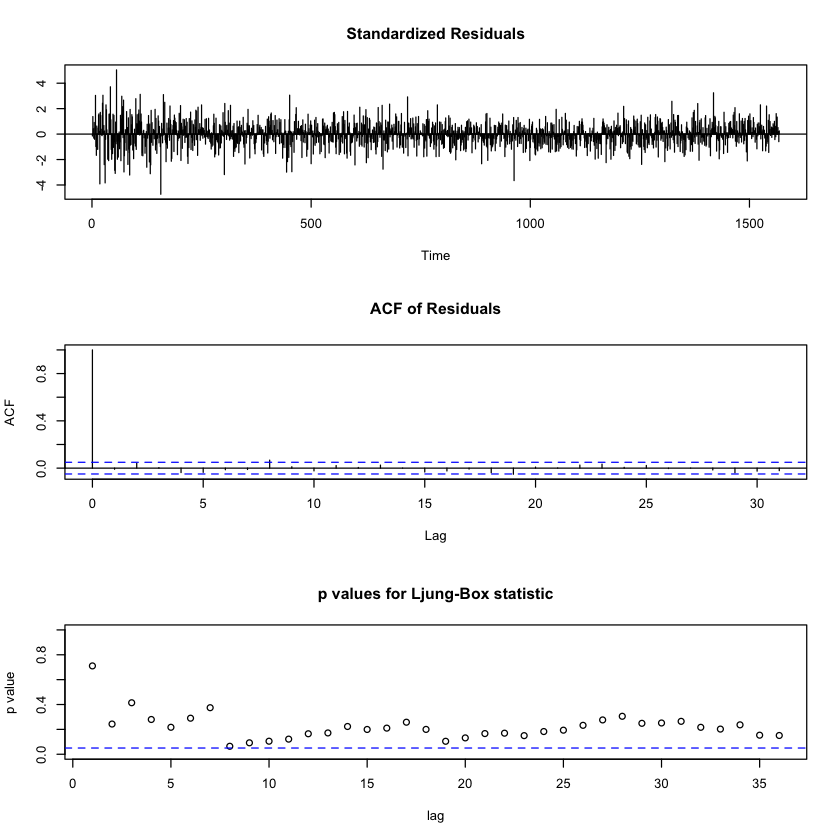

In [46]:
## trend-stationarity
time=c(1:1568) # time index
m2=lm(Gt~time)
summary(m2)
par(mfcol=c(2,1))
acf(m2$residuals,lag=36)
pacf(m2$residuals,lag=36) 
m2=arima(Gt,order=c(2,0,1),xreg=time)
m2
tsdiag(m2,gof=36)  # Significant ACF at lag 24.
m2=arima(Gt,order=c(2,0,1),seasonal=list(order=c(0,0,1),period=24),xreg=time)
m2
tsdiag(m2,gof=36) # model checking

In [48]:
### Comparison 
source("backtest.R")
pm1=backtest(m1,Gt,1368,1)
time=as.matrix(time)
pm2=backtest(m2,Gt,1368,1,xre=time)


Call:
lm(formula = Gt ~ time + time1)

Residuals:
   Min     1Q Median     3Q    Max 
-97.99 -13.81   1.14  14.03  70.14 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28.924419   1.191061  -24.29   <2e-16 ***
time          0.031330   0.001702   18.40   <2e-16 ***
time1         0.021397   0.001318   16.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.79 on 1565 degrees of freedom
Multiple R-squared:  0.5887,	Adjusted R-squared:  0.5882 
F-statistic:  1120 on 2 and 1565 DF,  p-value: < 2.2e-16



Call:
arima(x = Gt, order = c(2, 0, 1), seasonal = list(order = c(0, 0, 1), period = 24), 
    xreg = x1)

Coefficients:
         ar1      ar2      ma1    sma1  intercept    time   time1
      1.1220  -0.1973  -0.6835  0.0823   -29.2630  0.0317  0.0219
s.e.  0.0727   0.0542   0.0643  0.0239     4.1411  0.0058  0.0044

sigma^2 estimated as 267.5:  log likelihood = -6607,  aic = 13228


	Box-Ljung test

data:  mm1$residuals
X-squared = 15.46, df = 8, p-value = 0.0508


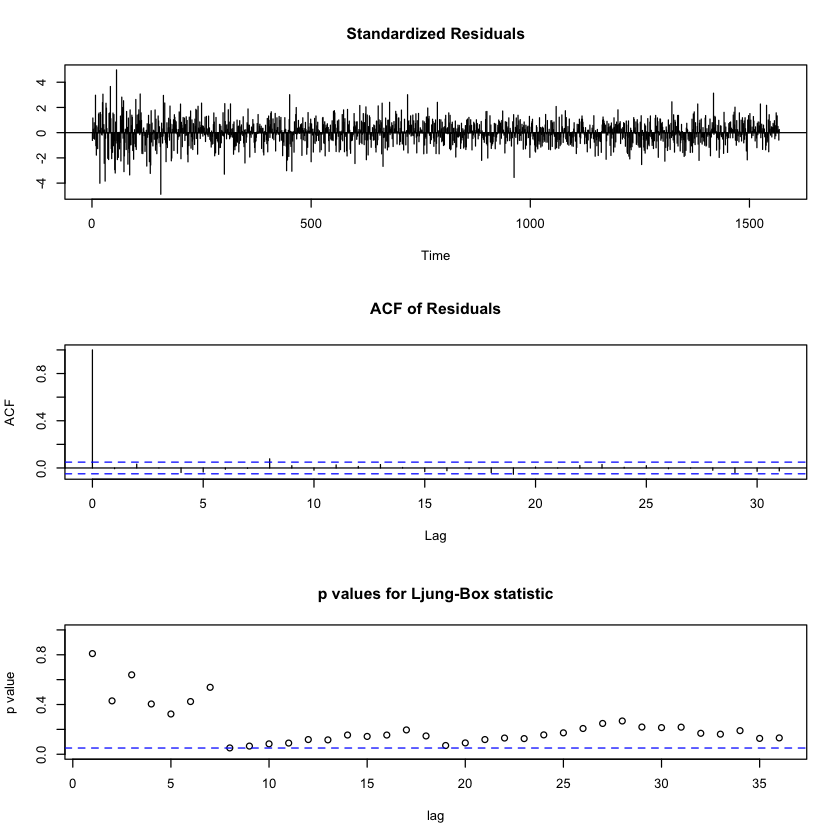

In [49]:
###
Gt=scan(file='ch3data/m-GLBTs.txt')
time=c(1:1568)
time1=c(rep(0,1212),time[1213:1568])
mm1=lm(Gt~time+time1)
summary(mm1)
x1=cbind(time,time1)
mm1=arima(Gt,order=c(2,0,1),seasonal=list(order=c(0,0,1),period=24),xreg=x1)
mm1
tsdiag(mm1,gof=36)
Box.test(mm1$residuals,lag=8,type='Ljung')


Call:
arima(x = temp, order = c(1, 1, 2), seasonal = list(order = c(0, 0, 1), period = 24))

Coefficients:
         ar1      ma1     ma2    sma1
      0.5817  -1.2414  0.2639  0.0854
s.e.  0.0704   0.0827  0.0781  0.0243

sigma^2 estimated as 0.0881:  log likelihood = -321.11,  aic = 650.21


Call:
arima(x = temp, order = c(2, 0, 1), seasonal = list(order = c(0, 0, 1), period = 24), 
    xreg = time)

Coefficients:
         ar1      ar2      ma1    sma1  intercept   xreg
      1.2975  -0.3057  -0.9344  0.0827    -0.4952  7e-04
s.e.  0.0562   0.0480   0.0430  0.0255     0.1178  1e-04

sigma^2 estimated as 0.08825:  log likelihood = -322.2,  aic = 656.4

ar1           ar2           ma1          sma1     intercept 
 1.2974716900 -0.3056922781 -0.9343898888  0.0826971041 -0.4952301968 
         xreg 
 0.0006613375

ar1        ar2        ma1       sma1  intercept       xreg 
 23.101928  -6.365140 -21.736830   3.249198  -4.205621   4.844103

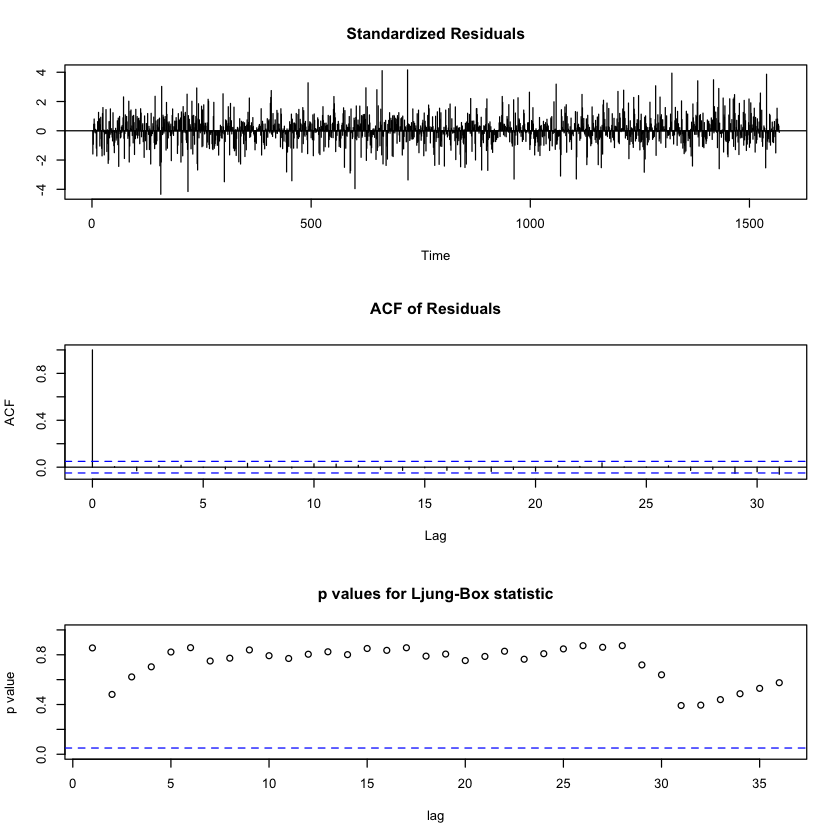

In [56]:
####
da=read.table("ch3data/m-ncdc-noaa-glbtemp.txt")
da=da[1:1568,]
temp=da[,3]
m3=arima(temp,order=c(1,1,2),seasonal=list(order=c(0,0,1),period=24))
m3
tsdiag(m3,gof=36)
m4=arima(temp,order=c(2,0,1),seasonal=list(order=c(0,0,1),period=24),xreg=time)
m4
m4$coef
m4$coef/sqrt(diag(m4$var.coef))  # Compute t-ratios 
# tsdiag(m4,gof=36)

In [ ]:
### Backtesting 
pm3=backtest(m3,temp,1368,1)
pm4=backtest(m4,temp,1368,1,xre=time)

# U.S. Monthly Unemployment Rates

[1] 753   4

,Year,mon,dd,rate
,<int>,<int>,<int>,<dbl>
1,1948,1,1,3.4
2,1948,2,1,3.8
3,1948,3,1,4.0
4,1948,4,1,3.9
5,1948,5,1,3.5
6,1948,6,1,3.6


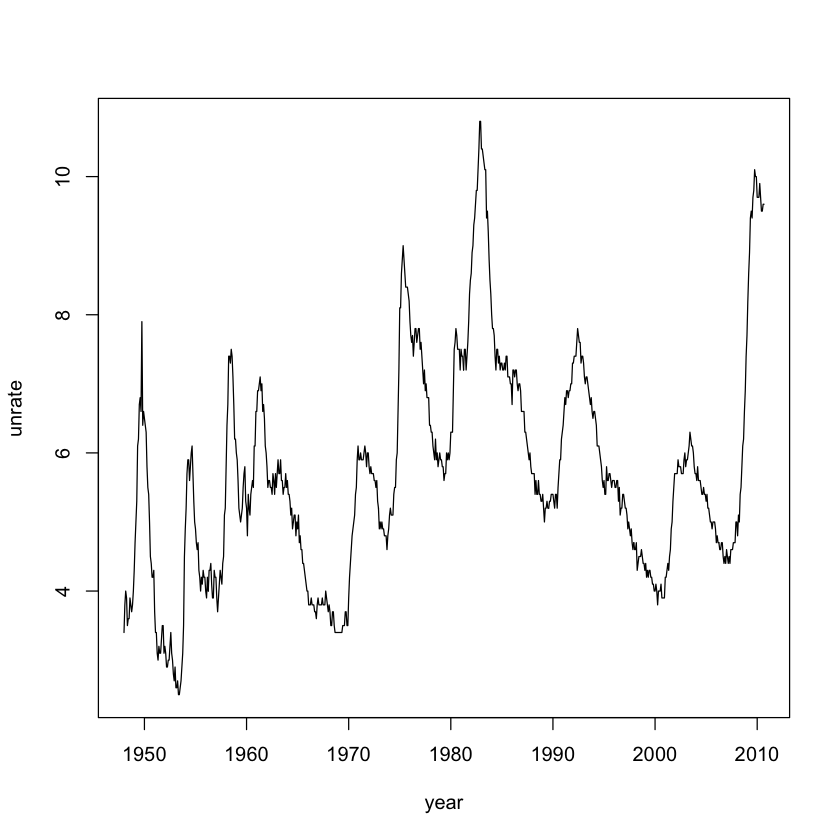

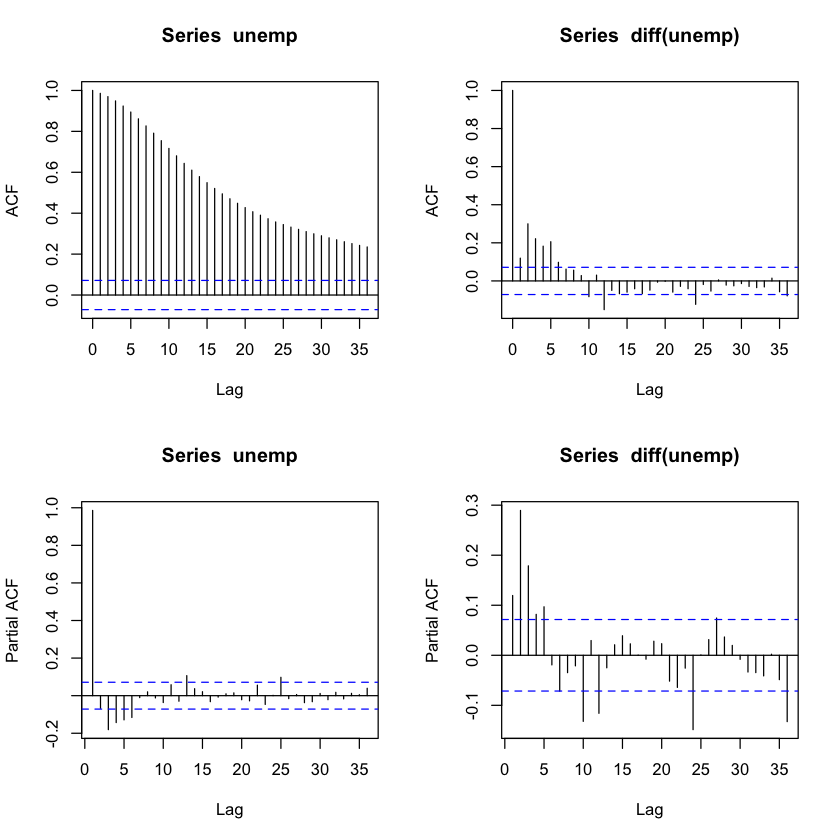

In [4]:
da=read.table('ch3data/m-unrate.txt',header=T)
dim(da)
head(da)
unemp=da$rate
unrate=ts(unemp,frequency=12,start=c(1948,1))
plot(unrate,xlab='year',ylab='unrate',type='l')
par(mfcol=c(2,2))
acf(unemp,lag=36)
pacf(unemp,lag=36)
acf(diff(unemp),lag=36)
pacf(diff(unemp),lag=36)


Call:
arima(x = unemp, order = c(1, 1, 5), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
         ar1      ma1     ma2     ma3     ma4     ma5    sar1     sma1
      0.7301  -0.7468  0.2194  0.0073  0.0383  0.0831  0.5978  -0.8469
s.e.  0.0686   0.0776  0.0462  0.0501  0.0467  0.0431  0.0672   0.0477

sigma^2 estimated as 0.03643:  log likelihood = 176.43,  aic = -334.87


Call:
arima(x = unemp, order = c(1, 1, 5), seasonal = list(order = c(1, 0, 1), period = 12), 
    fixed = c1)

Coefficients:
         ar1      ma1     ma2  ma3  ma4     ma5    sar1     sma1
      0.7536  -0.7744  0.2351    0    0  0.0990  0.6051  -0.8525
s.e.  0.0569   0.0650  0.0365    0    0  0.0386  0.0654   0.0457

sigma^2 estimated as 0.03649:  log likelihood = 175.75,  aic = -337.5


	Box-Ljung test

data:  m1$residuals
X-squared = 23.349, df = 24, p-value = 0.4993



	Box-Ljung test

data:  m1$residuals
X-squared = 32.459, df = 36, p-value = 0.6378


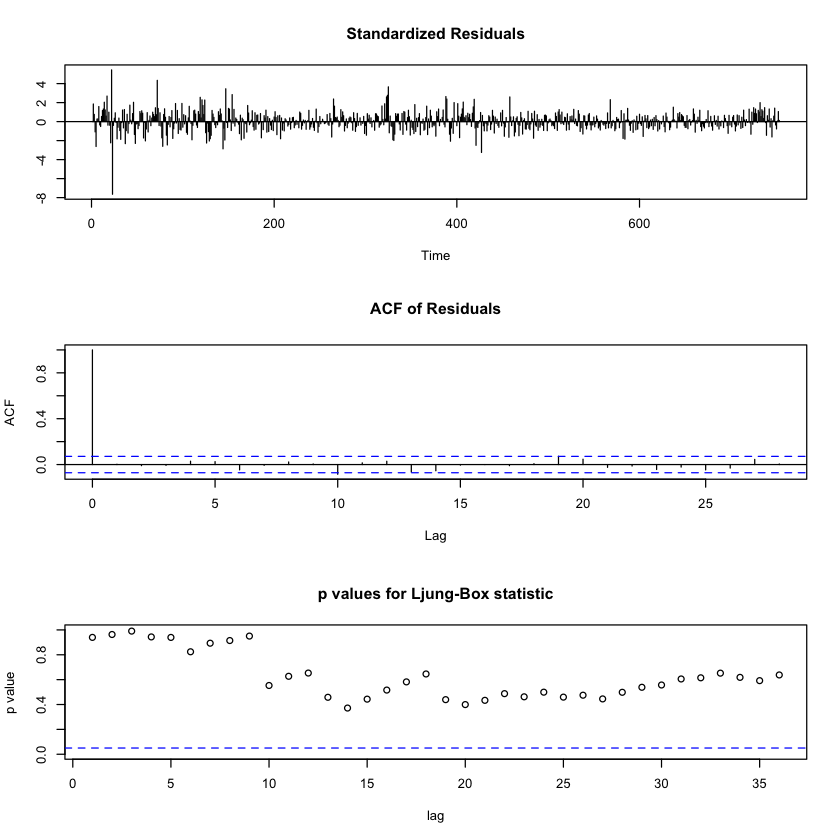

In [5]:
m1=arima(unemp,order=c(1,1,5),seasonal=list(order=c(1,0,1),period=12))
m1 
c1=c(NA,NA,NA,0,0,NA,NA,NA)
m1=arima(unemp,order=c(1,1,5),seasonal=list(order=c(1,0,1),period=12),fixed=c1)
m1
tsdiag(m1,gof=36)
Box.test(m1$residuals,lag=24,type='Ljung')
Box.test(m1$residuals,lag=36,type='Ljung')


Call:
arima(x = unemp, order = c(0, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
        sar1     sma1
      0.6195  -0.8670
s.e.  0.0658   0.0468

sigma^2 estimated as 0.04267:  log likelihood = 116.9,  aic = -227.8


Call:
arima(x = unemp, order = c(5, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
          ar1     ar2     ar3     ar4     ar5    sar1     sma1
      -0.0124  0.2101  0.1682  0.1024  0.1207  0.5624  -0.8233
s.e.   0.0365  0.0366  0.0366  0.0370  0.0366  0.0723   0.0526

sigma^2 estimated as 0.03663:  log likelihood = 174.57,  aic = -333.13


Call:
arima(x = unemp, order = c(5, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12), 
    transform.pars = FALSE, fixed = cc1)

Coefficients:
      ar1     ar2     ar3     ar4     ar5    sar1     sma1
        0  0.2104  0.1652  0.0996  0.1194  0.5643  -0.8240
s.e.    0  0.0366  0.0355  0.0362  0.0364  0.0724   0.0528

sigma^2 estimated as 0.03664:  log likelihood = 174.51,  aic = -335.02

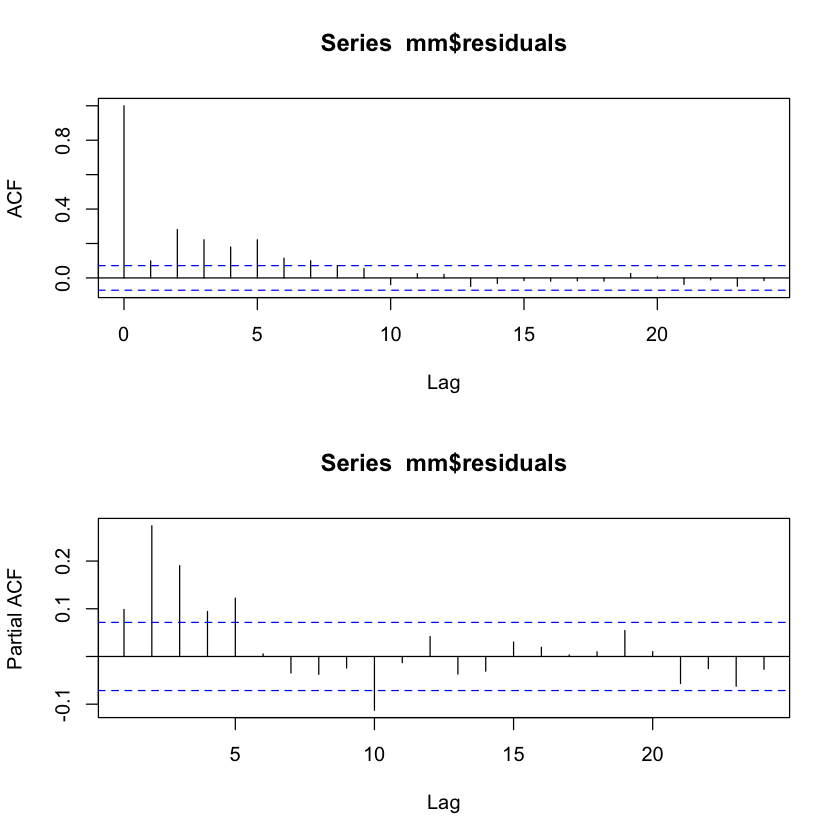

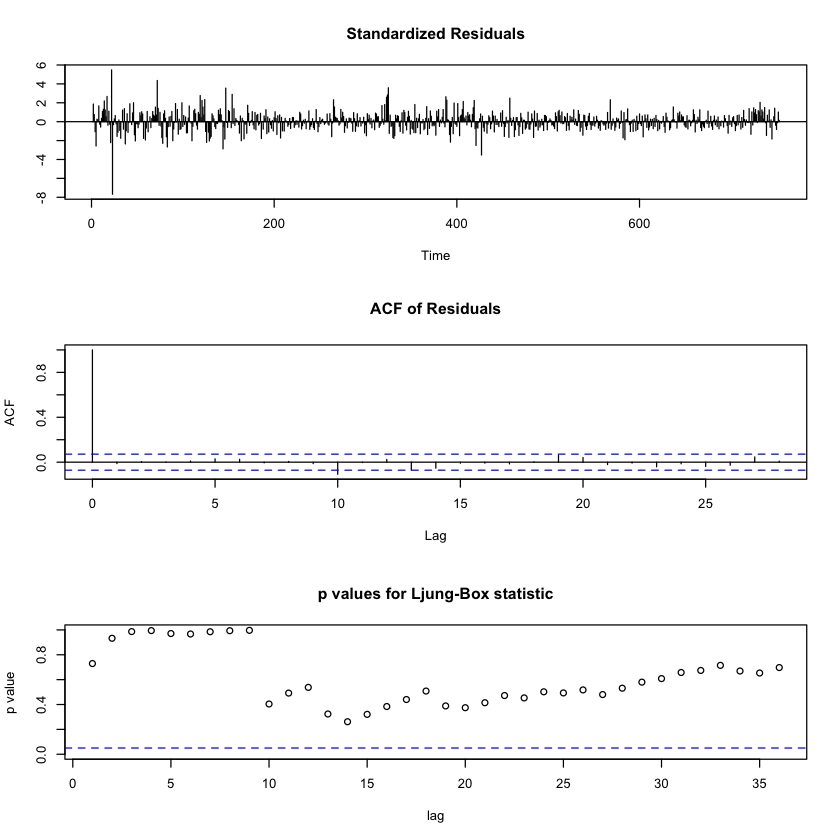

In [6]:
###
mm=arima(unemp,order=c(0,1,0),seasonal=list(order=c(1,0,1),period=12))
mm
par(mfcol=c(2,1))
acf(mm$residuals,lag=24)
pacf(mm$residuals,lag=24) 
mm1=arima(unemp,order=c(5,1,0),seasonal=list(order=c(1,0,1),period=12))
mm1
cc1=c(0,NA,NA,NA,NA,NA,NA)
mm1=arima(unemp,order=c(5,1,0),seasonal=list(order=c(1,0,1),period=12),fixed=cc1,transform.pars = FALSE)
mm1
tsdiag(mm1,gof=36)

In [ ]:
# Backtesting
source("backtest.R")
#pm1=backtest(m1,unemp,700,1,fixed=c1,inc.mean=F)
#pmm1=backtest(mm1,unemp,700,1,fixed=cc1,inc.mean=F)

,year,mon,dd,rate,w1m1,w2m1,w3m1,w4m1,icm1
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1967,2,1,3.8,208,207,217,204,836
2,1967,3,1,3.8,216,229,229,242,916
3,1967,4,1,3.8,310,241,245,247,1043
4,1967,5,1,3.8,259,257,299,245,1315
5,1967,6,1,3.9,254,231,230,228,943
6,1967,7,1,3.8,248,238,224,218,928



Call:
lm(formula = unrate ~ icm1, data = x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8638 -0.7008 -0.1299  0.7366  3.1746 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.5202     0.1785   8.518   <2e-16 ***
icm1          2.9047     0.1097  26.475   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.051 on 522 degrees of freedom
Multiple R-squared:  0.5731,	Adjusted R-squared:  0.5723 
F-statistic: 700.9 on 1 and 522 DF,  p-value: < 2.2e-16



Call:
arima(x = unrate, order = c(2, 0, 3), seasonal = list(order = c(1, 0, 1), period = 12), 
    xreg = x[, 5])

Coefficients:
         ar1      ar2      ma1     ma2     ma3    sar1     sma1  intercept
      1.8997  -0.9021  -0.8932  0.1458  0.0555  0.6501  -0.8520     6.0373
s.e.  0.0332   0.0331   0.0543  0.0565  0.0466  0.0824   0.0586     0.3706
      x[, 5]
      0.0772
s.e.  0.0212

sigma^2 estimated as 0.02419:  log likelihood = 227.7,  aic = -435.39


Call:
arima(x = unrate, order = c(2, 0, 2), seasonal = list(order = c(1, 0, 1), period = 12), 
    xreg = x[, 5])

Coefficients:
         ar1      ar2      ma1     ma2    sar1     sma1  intercept  x[, 5]
      1.9123  -0.9145  -0.9100  0.1860  0.6465  -0.8483     6.1111  0.0782
s.e.  0.0283   0.0282   0.0527  0.0479  0.0823   0.0591     0.3748  0.0213

sigma^2 estimated as 0.02426:  log likelihood = 226.97,  aic = -435.93

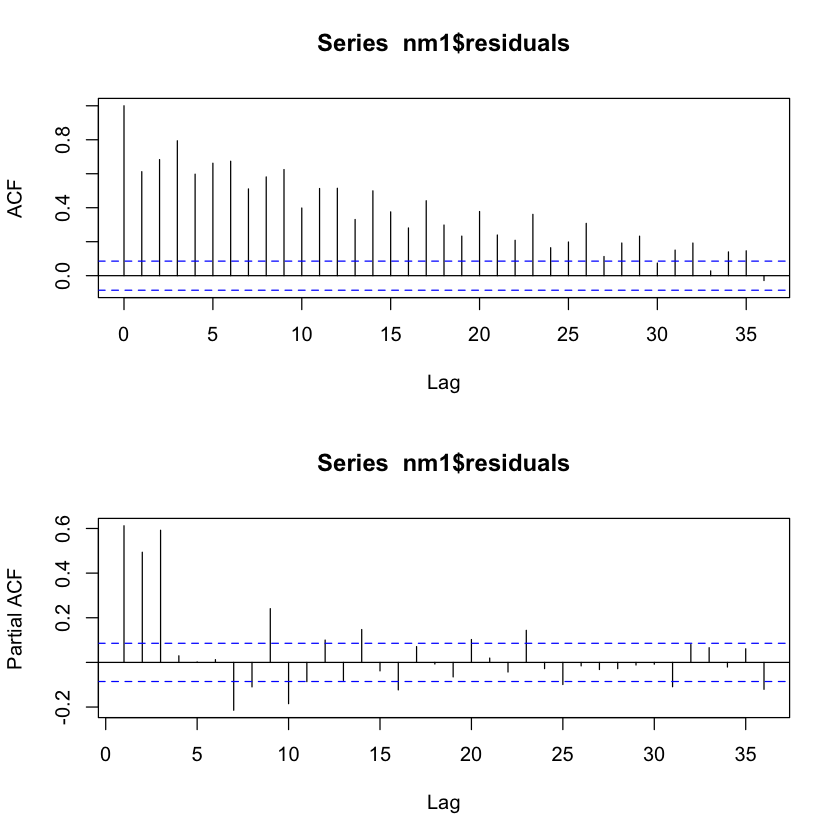

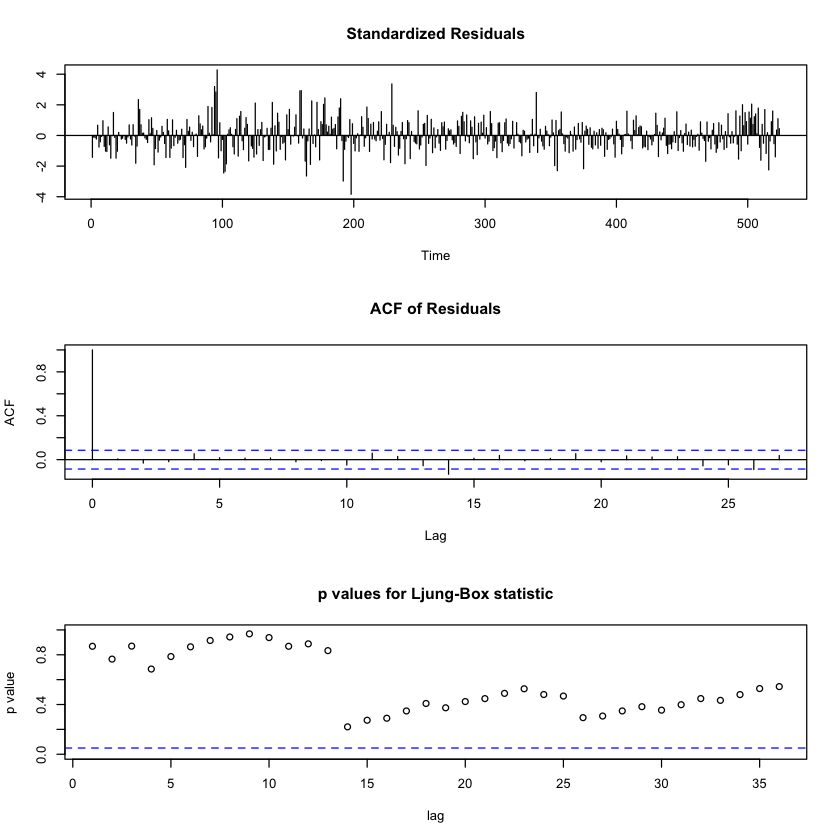

In [7]:
# Use of initial jobless claims
da=read.table("ch3data/m-unrateic.txt",header=T)
head(da)
unrate=da$rate
x=da[,5:9]/1000
nm1=lm(unrate~icm1,data=x)
summary(nm1)
par(mfcol=c(2,1))
acf(nm1$residuals,lag=36)
pacf(nm1$residuals,lag=36)
nm1=arima(unrate,order=c(2,0,3),xreg=x[,5],seasonal=list(order=c(1,0,1),period=12))
nm1
nm1=arima(unrate,order=c(2,0,2),xreg=x[,5],seasonal=list(order=c(1,0,1),period=12))
nm1
tsdiag(nm1,gof=36)


Call:
lm(formula = unrate ~ w1m1 + w2m1 + w3m1 + w4m1, data = x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.40629 -0.67602 -0.06686  0.62419  2.55888 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.5160     0.1651   3.125 0.001877 ** 
w1m1          6.5221     2.1145   3.084 0.002148 ** 
w2m1          9.6711     2.8630   3.378 0.000785 ***
w3m1         -2.4455     2.7980  -0.874 0.382506    
w4m1          1.6626     2.0624   0.806 0.420528    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8841 on 519 degrees of freedom
Multiple R-squared:  0.6998,	Adjusted R-squared:  0.6975 
F-statistic: 302.5 on 4 and 519 DF,  p-value: < 2.2e-16



Call:
lm(formula = unrate ~ w1m1 + w2m1 + icm1, data = x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.38463 -0.66090 -0.05253  0.64240  2.53776 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.5111     0.1648   3.101 0.002033 ** 
w1m1          6.3906     2.0751   3.080 0.002182 ** 
w2m1          8.4654     2.2365   3.785 0.000171 ***
icm1          0.1307     0.2110   0.619 0.535950    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8837 on 520 degrees of freedom
Multiple R-squared:  0.6995,	Adjusted R-squared:  0.6978 
F-statistic: 403.5 on 3 and 520 DF,  p-value: < 2.2e-16



Call:
lm(formula = unrate ~ w1m1 + w2m1, data = x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.40653 -0.66933 -0.05949  0.63075  2.56954 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.5127     0.1647   3.113  0.00195 ** 
w1m1          6.4594     2.0709   3.119  0.00191 ** 
w2m1          8.9609     2.0872   4.293  2.1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8832 on 521 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.6981 
F-statistic: 605.8 on 2 and 521 DF,  p-value: < 2.2e-16


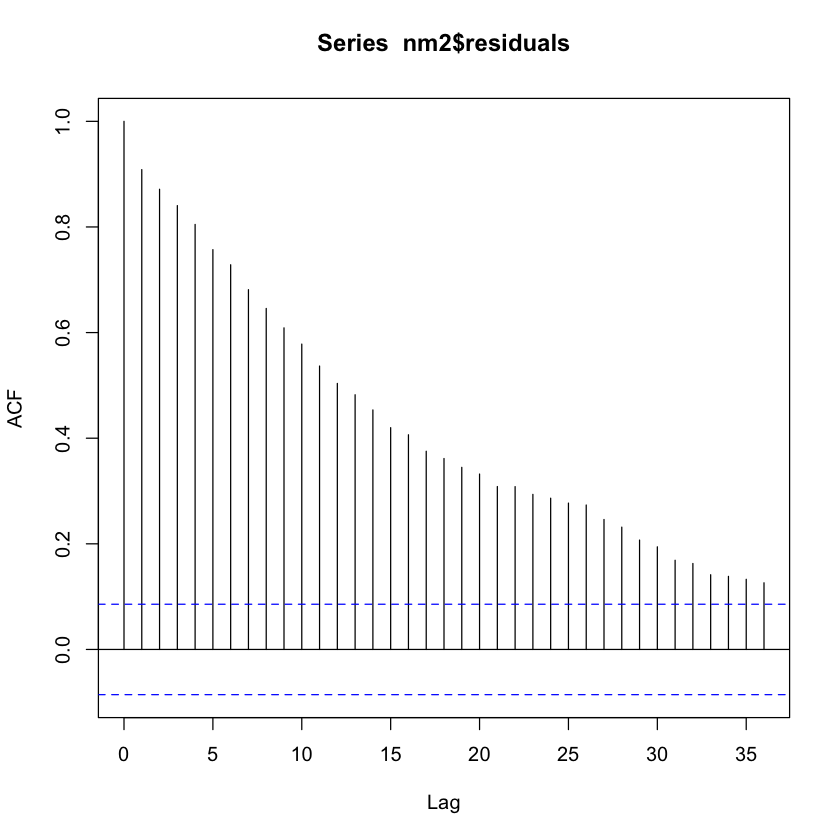


Call:
arima(x = unrate, order = c(2, 0, 2), seasonal = list(order = c(1, 0, 1), period = 12), 
    xreg = x[, 1:2])

Coefficients:
         ar1      ar2      ma1     ma2    sar1     sma1  intercept    w1m1
      1.9172  -0.9197  -0.9958  0.2532  0.6111  -0.7915     5.6555  0.4265
s.e.  0.0269   0.0268   0.0563  0.0507  0.1119   0.0883     0.3912  0.2721
        w2m1
      0.9693
s.e.  0.3206

sigma^2 estimated as 0.024:  log likelihood = 230.29,  aic = -440.59

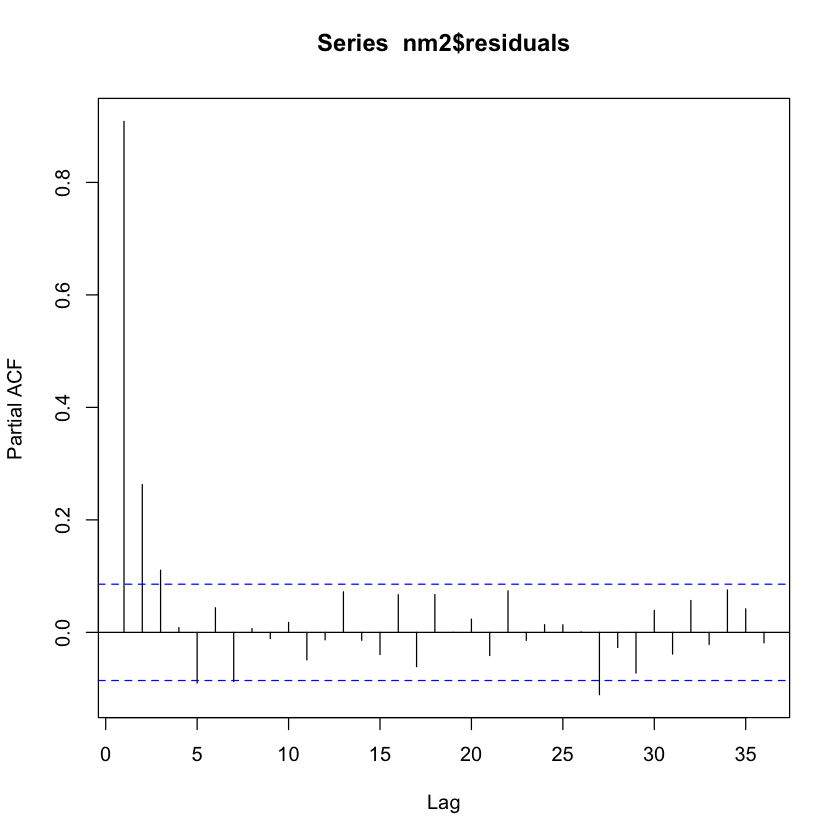

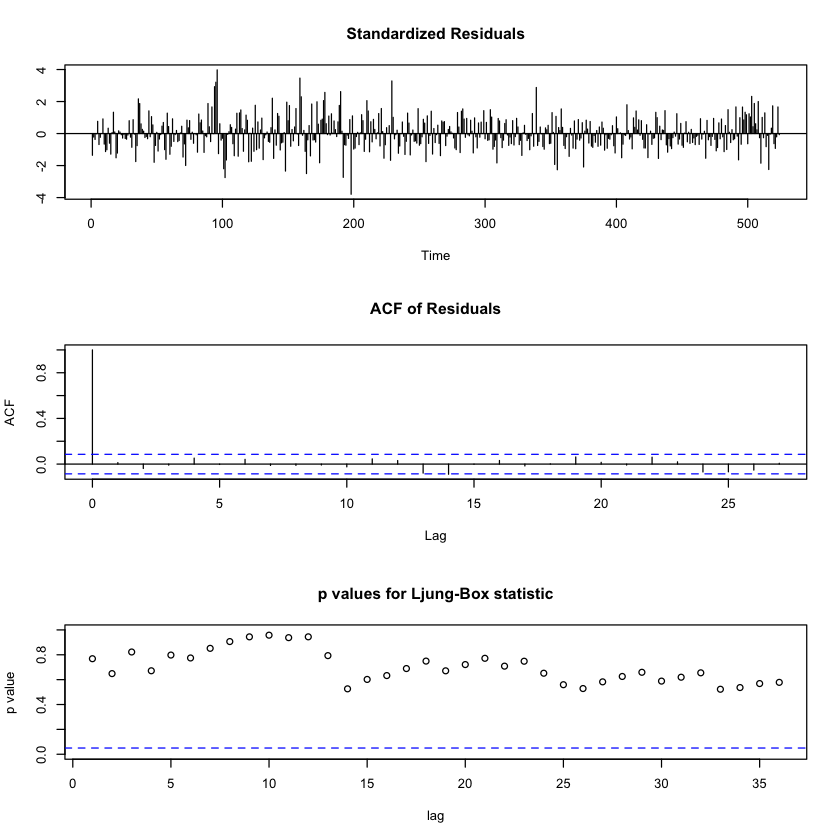

In [8]:
###
nm2=lm(unrate~w1m1+w2m1+w3m1+w4m1,data=x)
summary(nm2)
nm2=lm(unrate~w1m1+w2m1+icm1,data=x)
summary(nm2)
nm2=lm(unrate~w1m1+w2m1,data=x)
summary(nm2)
acf(nm2$residuals,lag=36)
pacf(nm2$residuals,lag=36)
nm2=arima(unrate,order=c(2,0,2),seasonal=list(order=c(1,0,1),period=12),xreg=x[,1:2])
nm2
tsdiag(nm2,gof=36)
##